In [1]:
import requests as req
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import json
import openweathermapy.core as ow
from citipy import citipy
import numpy as np

# Observations:
1 - The first plot represents the most well-known geographic theory in this assignment, which shows the relationship between the line of Ecuador with 2 degrees 00' S and 77 degrees 30' W, and receiving the most sun, and showing the highest temperatures. It enforces the further you are from that location, the colder the temperatures will be. 

2 - When observing the second plot, it shows that latitude influence on humidity is not as clear as shown in the previous plot. The humidy is communly higher in locations closer to the water, once the vapor content of the air is high; however, humidity can also be high in locations such as the polar regions, because most of the air is saturated, and even with a low vapor content of the air, the vapor capacity is considerably low, allowing a high himidity. That explains why the data is spreaded along the plot. 

3 - When observing the third plot, it shows the data spreaded as well. Clouds are formed with condensation or deposition of water above the Earth's surface. Therefore, we can find a big influence of humidity in cloudiness. 


In [2]:
world_cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)
for pair in lat_lngs:
    city = citipy.nearest_city(pair[0], pair[1])
    #print(pair[0])
    #print(pair[1])
    world_cities.append(city.city_name)
    print(city.city_name)
#print(lat_lngs[0])

balkhash
presidencia roque saenz pena
carnarvon
albany
talnakh
hermanus
arman
fortuna
cape town
asyut
castro
meadow lake
victoria
port hardy
christchurch
rikitea
arraial do cabo
walvis bay
qaanaaq
atuona
xiaoshi
codrington
tessalit
bluff
atbasar
avarua
havelock
kerman
rikitea
jamestown
port elizabeth
manggar
vaini
huarmey
ashcroft
punta arenas
ushuaia
touros
kapaa
zhangye
atuona
grindavik
tabasalu
homnabad
sinnamary
hudson bay
bredasdorp
kapaa
yinchuan
illoqqortoormiut
cidreira
sao filipe
lhokseumawe
punta arenas
jaque
east london
arrifes
calatayud
kalmunai
muros
albany
sur
vaini
taolanaro
sao joao da barra
bela
kutum
jalu
airai
mapiripan
padilla
mataura
vestmannaeyjar
dikson
hobart
cape town
punta arenas
inta
tuktoyaktuk
rikitea
ponta do sol
arraial do cabo
pizarro
atuona
turbat
elban
hilo
cape town
vaitupu
esperance
tiksi
hobart
seoul
vila
hilo
oyama
sitka
east london
tazovskiy
oktyabrskoye
gryfice
pirenopolis
dingle
atuona
hermanus
new norfolk
mataura
saleaula
samusu
hobart
georgeto

rikitea
rikitea
cape town
illoqqortoormiut
vaini
burica
geraldton
cherskiy
ahipara
longyearbyen
oistins
kapaa
arraial do cabo
lebu
hermanus
pangnirtung
ushuaia
cockburn town


In [3]:
api_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname('__file__'))))))
file_name = os.path.join(api_dir, "C:/Users/gpalv/Desktop/KU BootCamp Homework/Api_Keys/Google_api_key.json")

In [4]:
data = json.load(open(file_name))
gkey = data["owm_api_key"]

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

In [6]:
query_url = url + 'appid=' + gkey + "&units=" + units + "&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=


In [7]:
#test_1 = req.get(query_url + world_cities[13]).json()
#print(json.dumps(test_1, indent=2))

In [8]:
world_cities_df = pd.DataFrame(world_cities, columns=["City"])
world_cities_df.to_csv('file.csv', index=False)

In [9]:
world_cities_df['Latitude'] = ""
world_cities_df['Longitude'] = ""
world_cities_df['Temperature'] = ""
world_cities_df['Humidity'] = ""
world_cities_df['Cloudiness'] = ""
world_cities_df['Wind Speed'] = ""
world_cities_df["Date"] = ""
world_cities_df["Country"] = ""

In [10]:
world_cities_df['City'].duplicated().sum()

1237

In [11]:
world_cities_df.duplicated().sum()

1237

In [ ]:
#world_cities_df.loc[world_cities_df.duplicated(), :]

In [12]:
world_cities = world_cities_df.drop_duplicates(keep='first', inplace=True)

In [ ]:
#world_cities_df.head(13)
#del world_cities_df['Data']
#world_cities_df.drop(world_cities.index[[700:1499]], inplace=True)
#world_cities_df.drop(699, inplace=True)

In [53]:
for index, row in world_cities_df.iterrows():
    try:
        #print("row: " + row["City"])
        city = row["City"].replace(' ', "+")
        url = "http://api.openweathermap.org/data/2.5/weather?"
        target_url = url + 'appid=' + gkey + "&units=" + units + "&q=" + city
        cities_lat_lon = req.get(target_url).json()
        cities_temp = req.get(target_url).json()
        cities_humi = req.get(target_url).json()
        cities_cloud = req.get(target_url).json()
        cities_wind = req.get(target_url).json()
        cities_date = req.get(target_url).json()
        cities_country = req.get(target_url).json()
        world_cities_df.set_value(index, 'Country', cities_lat_lon['sys']['country'])
        world_cities_df.set_value(index, 'Date', cities_lat_lon['dt'])
        world_cities_df.set_value(index, 'Wind Speed', cities_lat_lon['wind']['speed'])
        world_cities_df.set_value(index, 'Cloudiness', cities_lat_lon['clouds']['all'])
        world_cities_df.set_value(index, 'Humidity', cities_lat_lon['main']['humidity'])
        world_cities_df.set_value(index, 'Latitude', cities_lat_lon['coord']['lat'])
        world_cities_df.set_value(index, 'Longitude', cities_lat_lon['coord']['lon'])
        world_cities_df.set_value(index, 'Temperature', cities_temp['main']['temp'])
        print(target_url)
    except KeyError:
        continue
#world_cities_df.head()

http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=balkhash
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=presidencia+roque+saenz+pena
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=carnarvon
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=albany
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=talnakh
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=hermanus
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=arman
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=fortuna
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&unit

http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=tiksi
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=seoul
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=vila
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=oyama
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=sitka
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=tazovskiy
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=oktyabrskoye
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=gryfice
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=pirenopolis
h

http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=kendari
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=bambanglipuro
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=fukue
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=aksay
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=tateyama
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=kattivakkam
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=coquimbo
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=puerto+leguizamo
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imp

http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=miracema+do+tocantins
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=tuatapere
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=richards+bay
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=tura
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=kavieng
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=bundaberg
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=saint-philippe
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=creel
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&u

http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=aktau
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=mulege
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=salalah
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=san+carlos+del+zulia
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=nishihara
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=norden
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=bangkalan
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=saint+anthony
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=I

http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=nipawin
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=timizart
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=twin+falls
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=manaure
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=glasgow
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=bandundu
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=salina+cruz
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=biharamulo
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial

http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=peniche
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=kaduy
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=vesyegonsk
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=faanui
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=madimba
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=san+quintin
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=garowe
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=batagay-alyta
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=

http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=alofi
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=tucuman
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=skibbereen
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=progreso
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=boende
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=sao+gabriel+da+cachoeira
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=volgorechensk
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=newport+beach
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9

http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=komsomolskiy
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=dalhousie
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=khorramabad
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=santona
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=kautokeino
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=alexandria
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=knysna
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=barcelos
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imp

http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=verkhnyaya+inta
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=sao+joao+da+boa+vista
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=brae
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=mahibadhoo
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=san+policarpo
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=dukat
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=zhaotong
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3&units=Imperial&q=teguise
http://api.openweathermap.org/data/2.5/weather?appid=f38d388b43233b5fc23044b21a9a9cf3

In [77]:
#world_cities_df.iloc[]
#world_cities_df.isnull().sum()
#world_cities_df.reset_index(level=0, drop=True)
#np.where(world_cities_df.applymap(lambda x: x == ''))

In [138]:
#world_cities_df

In [139]:
world_cities_df.count()

City           681
Latitude       681
Longitude      681
Temperature    681
Humidity       681
Cloudiness     681
Wind Speed     681
Date           681
Country        681
dtype: int64

In [180]:
world_cities_df.head(6)

Latitude Longitude Temperature Humidity  \
City                                                                   
balkhash                        46.84     74.98        8.29      100   
presidencia roque saenz pena   -26.79    -60.44       70.39       90   
carnarvon                      -30.97     22.13       80.97       35   
albany                          42.65    -73.75       27.91       74   
talnakh                         69.49     88.39        8.97       84   
hermanus                       -34.42     19.24       90.37       35   

                             Cloudiness Wind Speed        Date Country  
City                                                                    
balkhash                              0       7.85  1517216581      KZ  
presidencia roque saenz pena          0       5.17  1517216582      AR  
carnarvon                             0      10.42  1517216583      ZA  
albany                               40       6.93  1517215860      US  
talnakh                              68       14.9  1517216586      RU  
hermanus                              0       1.92  1517216587      ZA

In [141]:
world_cities_df = world_cities_df.set_index("City")

In [142]:
world_cities_df.to_csv('file.csv', index=False)

In [144]:
%matplotlib inline

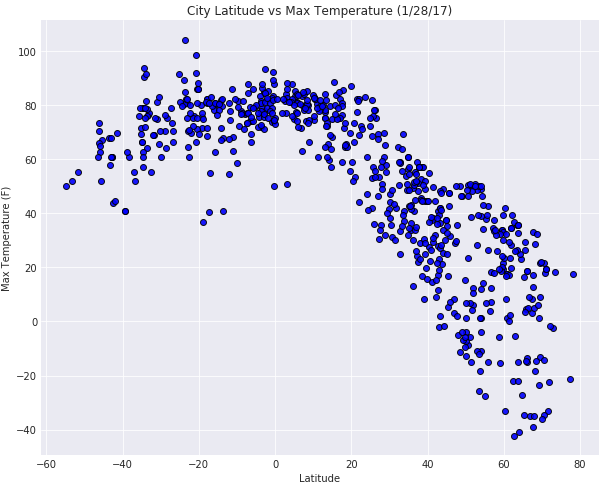

In [176]:
color = ['blue']

with plt.style.context("seaborn-darkgrid"):
    plt.figure(figsize=(10,8))
    weather_plot_1 = plt.scatter(x=world_cities_df["Latitude"], y=world_cities_df["Temperature"],color=color, marker='o', 
    alpha=.9, edgecolor= 'black', linewidths=1.0)
    plt.title("City Latitude vs Max Temperature (1/28/17)")
    plt.ylabel("Max Temperature (F)")
    plt.xlabel("Latitude")
    plt.savefig('weather_plot_1.png')
plt.show()

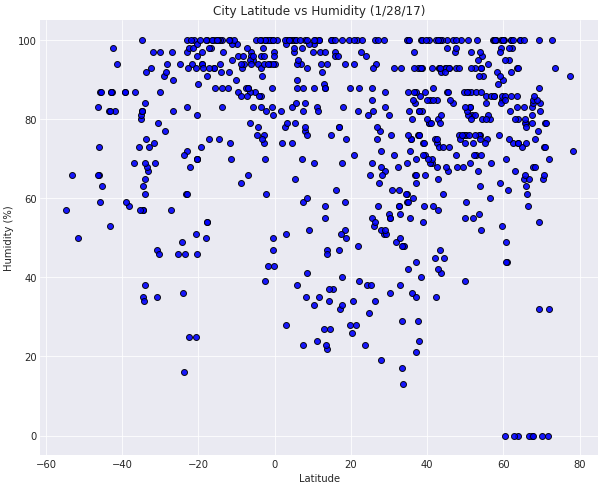

In [177]:
color = ['blue']

with plt.style.context("seaborn-darkgrid"):
    plt.figure(figsize=(10,8))
    weather_plot_2 = plt.scatter(x=world_cities_df["Latitude"], y=world_cities_df["Humidity"],color=color, marker='o', 
    alpha=.9, edgecolor= 'black', linewidths=1.0)
    plt.title("City Latitude vs Humidity (1/28/17)")
    plt.ylabel("Humidity (%)")
    plt.xlabel("Latitude")
    plt.savefig('weather_plot_2.png')
plt.show()

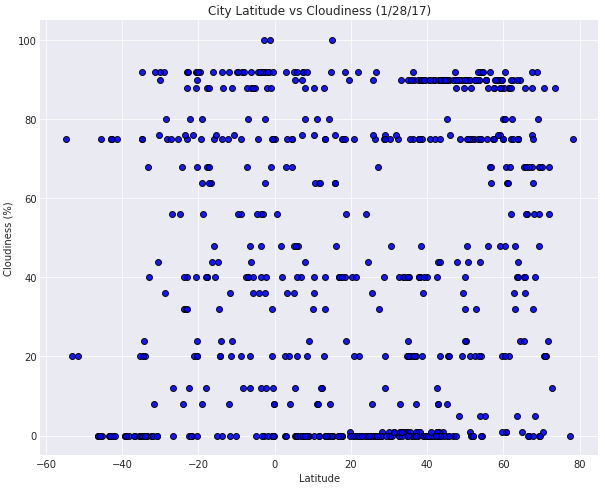

In [178]:
color = ['blue']

with plt.style.context("seaborn-darkgrid"):
    plt.figure(figsize=(10,8))
    weather_plot_3 = plt.scatter(x=world_cities_df["Latitude"], y=world_cities_df["Cloudiness"],color=color, marker='o', 
    alpha=.9, edgecolor= 'black', linewidths=1.0)
    plt.title("City Latitude vs Cloudiness (1/28/17)")
    plt.ylabel("Cloudiness (%)")
    plt.xlabel("Latitude")
    plt.savefig('weather_plot_3.png')
plt.show()

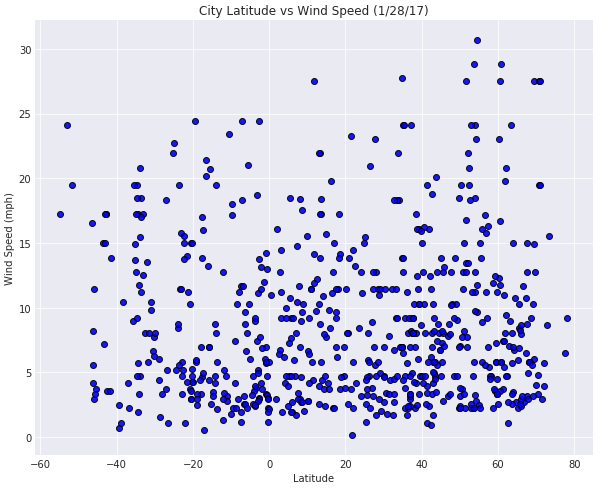

In [179]:
color = ['blue']

with plt.style.context("seaborn-darkgrid"):
    plt.figure(figsize=(10,8))
    weather_plot_4 = plt.scatter(x=world_cities_df["Latitude"], y=world_cities_df["Wind Speed"],color=color, marker='o', 
    alpha=.9, edgecolor= 'black', linewidths=1.0)
    plt.title("City Latitude vs Wind Speed (1/28/17)")
    plt.ylabel("Wind Speed (mph)")
    plt.xlabel("Latitude")
    plt.savefig('weather_plot_4.png')
plt.show()